In [9]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from tqdm.notebook import tqdm

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

class MNIST:
    
    def __init__(self, k = 5):
        self.train_X = None
        self.train_y = None
        self.test_X = None
        self.test_y = None
        self.k = k
        
    def get_train_X(self):
        return self.train_X
    
    def get_train_y(self):
        return self.train_y
        
    def get_test_X(self):
        return self.test_X
        
    def get_test_y(self):
        return self.test_y
   
    def load(self):
        print('Loading dataset...')
        (X, y), (X1, y1) = mnist.load_data()
        self.train_X = X
        self.train_y = y
        self.test_X = X1
        self.test_y = y1
        print('Dataset loaded !')
        
    def console(self):
        print('X_train: ' + str(self.train_X.shape))
        print('Y_train: ' + str(self.train_y.shape))
        print('X_test:  '  + str(self.test_X.shape))
        print('Y_test:  '  + str(self.test_y.shape))
    
    def plot_digit_train(self, start: int, end: int):
        print("Plot from " + str(start) + " to " + str(end) + " element")
        for i in range(start, end):  
            # pyplot.subplot(330 + 1 + i)
            print(self.train_y[i])
            pyplot.imshow(self.train_X[i], cmap=pyplot.get_cmap('gray'))
            pyplot.show()
    
    def plot_digit_test(self, start: int, end: int):
        print("Plot from " + str(start) + " to " + str(end) + " element")
        for i in range(start, end):  
            # pyplot.subplot(330 + 1 + i)
            print(self.test_y[i])
            pyplot.imshow(self.test_X[i], cmap=pyplot.get_cmap('gray'))
            pyplot.show()
        
    def get_occ(self):
        list = {}

        for i in range(1,11):
            # list[i] = {"train": np.count_nonzero(self.get_train_X() == i), "test": np.count_nonzero(self.get_test_X() == i)}
            list[i] = np.count_nonzero(self.get_train_X() == i)
            
        return list
            
    def plot_diagram(self,list_occ):

        fig, ax = plt.subplots()

        # bar_labels = ['red', 'blue', '_red', 'orange']
        # bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

        ax.bar(list_occ.keys(), list_occ.values()) #, label=bar_labels, color=bar_colors)

        ax.set_ylabel('Occurences')
        ax.set_title('Occurences of each digit')
        # ax.legend(title='Number')

        plt.show()
    
    def kNN(self, x, k, data, label):
        #create a list of distances between the given image and the images of the training set
        #distances =[np.linalg.norm(x-data[i]) for i in range(len(data))]
        distances =[np.sum(np.square(x-data[i])) for i in range(len(data))]
        #Use "np.argpartition". It does not sort the entire array. 
        #It only guarantees that the kth element is in sorted position 
        # and all smaller elements will be moved before it. 
        # Thus the first k elements will be the k-smallest elements.
        idx = np.argpartition(distances, k)
        clas, freq = np.unique(label[idx[:k]], return_counts=True)
        return clas[np.argmax(freq)]
        
    def kNN2(self, k=3):
        neigh = KNeighborsClassifier(n_neighbors=k)
        
        neigh.fit(self.train_X.reshape(self.train_X.shape[0], 28*28), self.train_y)
        
        expected = self.test_y.tolist()
        
        predicted = neigh.predict(self.test_X.reshape(self.test_X.shape[0], 28*28))
        
        # print(accuracy_score(expected, predicted))
        return(accuracy_score(expected, predicted))

In [30]:
o = MNIST()
o.load()

Loading dataset...
Dataset loaded !


Plot from 10 to 11 element
3


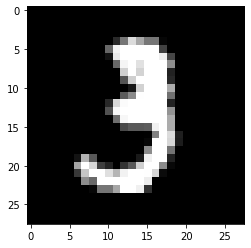

In [31]:
o.plot_digit_train(10, 11)

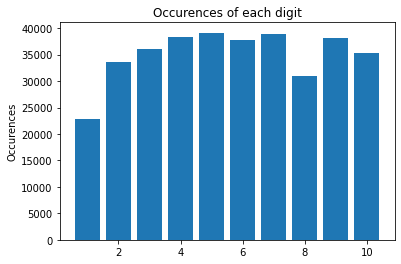

In [32]:
o.plot_diagram(o.get_occ())

Plot from 0 to 1 element
7


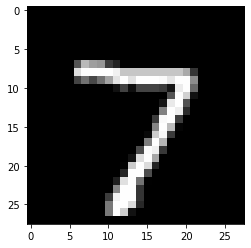

Prediction :  7 expectation : None


In [33]:
p = o.kNN(o.get_test_X()[0], 5, o.get_train_X(), o.get_train_y())
e = o.plot_digit_test(0, 1)
print("Prediction : ", p, "expectation :", e)

In [34]:
o.kNN2(3)

0.9705

K :  1
K :  2
K :  3
K :  4
K :  5
K :  6
K :  7
K :  8
K :  9


<AxesSubplot:xlabel='k'>

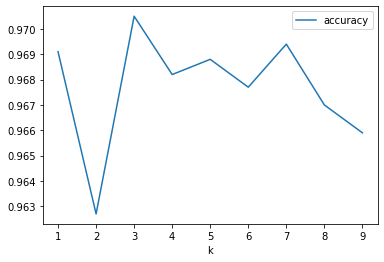

In [35]:
list = []
# for k in tqdm(range(1,10)):
for k in range(1,10):
    print("K : ", k)
    var = o.kNN2(k)
    list.append({"k": k, "accuracy": var})

df = pd.DataFrame(list, columns=['k','accuracy']).set_index("k")
df.plot()